In [ ]:
!pip install slycot
!pip install control

     |████████████████████████████████| 1.5 MB 16.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for slycot: filename=slycot-0.4.0-cp37-cp37m-linux_x86_64.whl size=1418257 sha256=752e4f749030c47de55e597f427974e561856d02feeb79db53a7bc322323f3a4
  Stored in directory: /root/.cache/pip/wheels/fa/b2/19/1e6568896fbabaf2a03d2fb6575211d281afcb9e00ce026cf6
Successfully built slycot
     |████████████████████████████████| 357 kB 29.6 MB/s 
  Created wheel for control: filename=control-0.9.1-py2.py3-none-any.whl size=364703 sha256=0a90766401d22f818c72a3b85d5dae2b5fd79b5c6e11a8b3c895116ebdb52483
  Stored in directory: /root/.cache/pip/wheels/b1/50/22/8005107713828997d1af664fbd629c7f935a1b87fc2f4ba6c1
Successfully built control


The following code generated our input vs time graph for a function

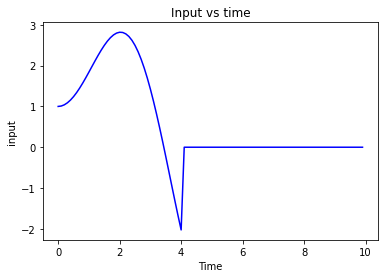

In [ ]:
from control.timeresp import impulse_response
from control.matlab import *
import numpy as np
import matplotlib.pyplot as plt
from math import sin
%matplotlib inline

DT = 0.1
DT1 = 0.8
DT2 = 0.3

t = np.arange(0,10,DT)
t1 = np.arange(0,10,DT1)
t2 = np.arange(0,10,DT2)
F = []
for i in range(len(t)):

  f = (sin(t[i]) * t[i] + 1) * (t[i]<4.1) 
  F.append(f)

F1 = []
for i in range(len(t1)):

  f = (sin(t1[i]) * t1[i] + 1) * (t1[i]<4.1) 
  F1.append(f)

F2 = []
for i in range(len(t2)):

  f = (sin(t2[i]) * t2[i] + 1) * (t2[i]<4.1) 
  F2.append(f)

sys = tf(1,[1,1,1])
plt.plot(t,F,'b')
plt.xlabel('Time')
plt.ylabel('input')
plt.title('Input vs time')
plt.show()

The following code represents our continous function from above by a discrete function with dt of 0.8

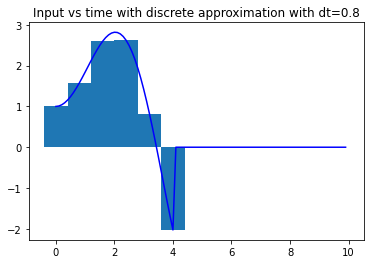

In [ ]:
plt.plot(t,F,'b')
plt.bar(t1,F1,0.8)
plt.title('Input vs time with discrete approximation with dt=0.8')
plt.show()

The superposition theorem states that the response of the system to the string of impulses is just the sum of the response to the individual impulses.  The response of the system to the individual impulses with a dt of 0.8 is shown below.

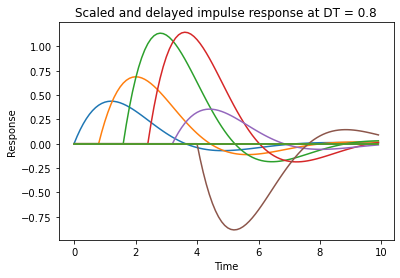

In [ ]:
T, h = impulse_response(sys,t)

imp = np.zeros((len(t), len(t1)))

for i in range(len(t1)):
  offset = (i)*round(DT1/DT)
  x = h*F1[i] * DT1
  imp[(offset):len(t),i] = x[0:(len(t) - offset)]
  plt.plot(t,imp[:,i])
plt.xlabel('Time')
plt.ylabel('Response')
plt.title('Scaled and delayed impulse response at DT = 0.8')
plt.show()

The summed response is shown in the graph below

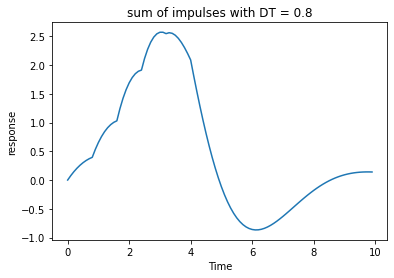

In [ ]:
approx = np.sum(imp,1)
plt.plot(t,approx)
plt.title('sum of impulses with DT = 0.8')
plt.xlabel('Time')
plt.ylabel('response')
plt.show()

The summed response is shown in the graph below but this time with a dt of 0.8

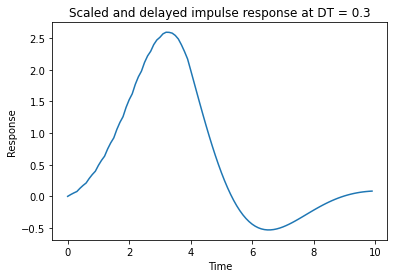

In [ ]:
imp2 = np.zeros((len(t), len(t2)))
for i in range(len(t2)):
  offset = (i)*round(DT2/DT)
  x = h*F2[i] * DT2
  imp2[(offset):len(t),i] = x[0:(len(t) - offset)]

approx2 = np.sum(imp2,1)
plt.plot(t,approx2)
plt.xlabel('Time')
plt.ylabel('Response')
plt.title('Scaled and delayed impulse response at DT = 0.3')
plt.show()

The graph below shows the "exact" response along with the response solved by using lsim and convolve functions from matlab.

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:918: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


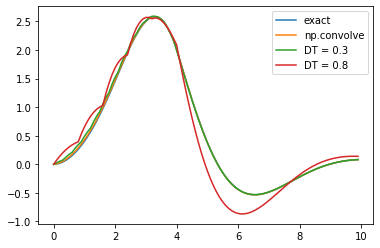

In [ ]:
solved = lsim(sys,F,t)
solved_again = np.convolve(F,h)*DT
plt.plot(t,solved[0],label='exact')
plt.plot(t,solved_again[0:len(t)],label='np.convolve')
plt.plot(t,approx2, label='DT = 0.3')
plt.plot(t,approx, label='DT = 0.8')
plt.legend()
plt.show()